## Demonstration of StateSpacePTA.jl

This notebook demonstrates the use of StateSpacePTA.jl to generate some synthetic pulsar timing data and then use a Kalman filter to recover the underlying state.



In [2]:
using Revise
using StateSpacePTA

[ Info: progress logging is enabled globally


In [3]:
state,measurements,PTA,θ̂,P = setup();
model_likelihood,model_predictions = KF(measurements,PTA,θ̂);

In [5]:
model_likelihood

596372.9587002111

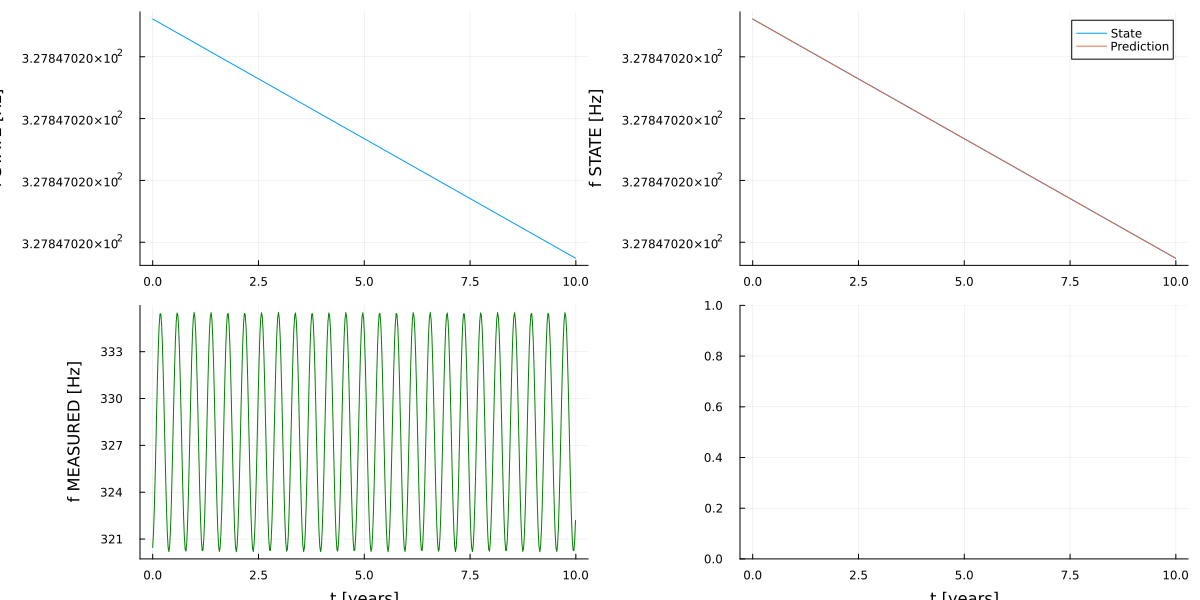

┌ Info: ("The variance in the state is:", 1.2546056175802035e-14)
└ @ StateSpacePTA /Users/t1/github_repos/StateSpacePTA/src/plotting.jl:14
┌ Info: ("Final f - Initial f = ", -3.868971134579624e-7)
└ @ StateSpacePTA /Users/t1/github_repos/StateSpacePTA/src/plotting.jl:15
┌ Info: ("Δf between steps is = ", -7.426024239975959e-10)
└ @ StateSpacePTA /Users/t1/github_repos/StateSpacePTA/src/plotting.jl:16


In [4]:
plotter(PTA.t,state,measurements,model_predictions,nothing,1)


In [78]:
state,measurements,PTA,θ̂,P = setup(δ=0.920);

┌ Info: All pulsars selected
└ @ StateSpacePTA /Users/t1/github_repos/StateSpacePTA/src/pulsars.jl:38
┌ Info: ("Hello from StateSpacePTA. You are running with NF = ", Float64, " and a GW strain h = ", 0.01)
└ @ StateSpacePTA /Users/t1/github_repos/StateSpacePTA/src/run.jl:31


In [17]:
#xx = LinRange(-π/2.0, π/2.0, 10)
#xx = -1.4:+1.4:0.1 #range(-1.4,1.4,0.1)
xx = collect(-1.4:0.01:1.4)  # time range to integrate over 
xx = LinRange(1e-9, 1e-6, 100)  # time range to integrate over 

yy = zeros(Float64,length(xx))
k = 1
for i in xx

    #println(i)

    state,measurements,PTA,θ̂,P = setup(δ=0.4634839481415,δ_guess=0.4634839481415,ω_guess=i);
    model_likelihood,model_predictions = KF(measurements,PTA,θ̂);
    
    yy[k] = model_likelihood
    #yy[k] = k

     k+=1

end 



In [18]:
using Plots 

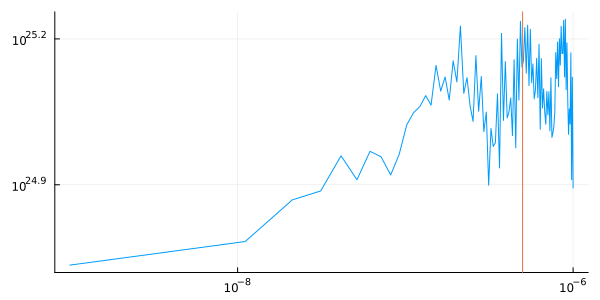

In [16]:
yabs = abs.(yy);
plt = plot(xx,yabs, size=(600,300),legend=false,link = :x,yaxis=:log,xaxis=:log)
vline!([5e-7])
#vline!([0.40])

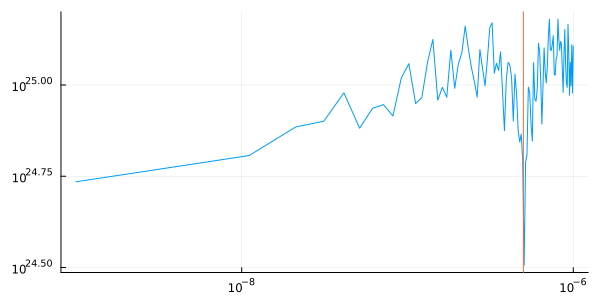

In [19]:
yabs = abs.(yy);
plt = plot(xx,yabs, size=(600,300),legend=false,link = :x,yaxis=:log,xaxis=:log)
vline!([5e-7])
#vline!([0.40])